# Titanic Survival Prediction

## Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from  sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Reading Dataset

In [3]:
df=pd.read_csv("ML4 Logi Reg Titanic Survival.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

## Cleaning & EDA

In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

#### Removing Null Values

In [8]:
df=df.drop(["Cabin",'Name','Ticket'],axis=1)

In [9]:
df["Age"].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [10]:
df["Age"]=np.ceil(df["Age"])

In [11]:
df["Age"].unique()

array([22., 38., 26., 35., nan, 54.,  2., 27., 14.,  4., 58., 20., 39.,
       55., 31., 34., 15., 28.,  8., 19., 40., 66., 42., 21., 18.,  3.,
        7., 49., 29., 65.,  5., 11., 45., 17., 32., 16., 25.,  1., 30.,
       33., 23., 24., 46., 59., 71., 37., 47., 12.,  9., 51., 56., 41.,
       44., 61., 50., 36., 62., 52., 63., 43., 60., 10., 64., 13., 48.,
       53., 57., 80., 70.,  6., 74.])

In [12]:
df["Age"]=df["Age"].fillna(np.ceil(df["Age"].mean()))

In [13]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [14]:
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])
# df=df.dropna()

In [15]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [16]:
df["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [17]:
df.shape

(891, 9)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


### Histograms & Barcharts

array([[<AxesSubplot:title={'center':'Parch'}>]], dtype=object)

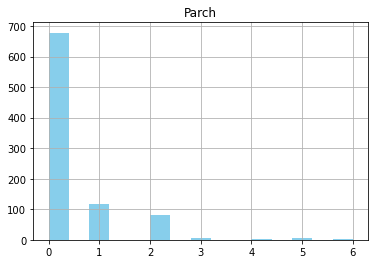

In [19]:
df.hist("Parch",color='skyblue',bins=15)

<AxesSubplot:>

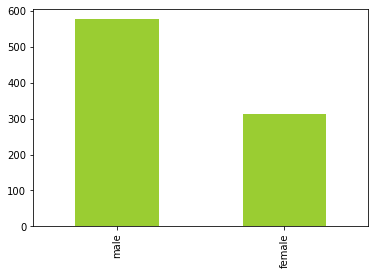

In [20]:
df["Sex"].value_counts().plot(kind='bar',color='yellowgreen')

(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

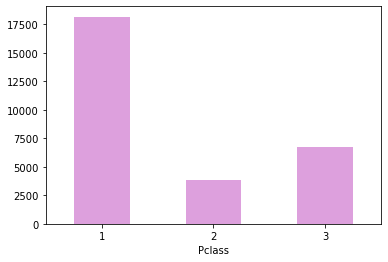

In [21]:
df.groupby(["Pclass"])['Fare'].sum().plot(kind='bar',color='plum')
plt.xticks(rotation=0)

#### Pie Chart of Passenger Class Value Count

<AxesSubplot:ylabel='Pclass'>

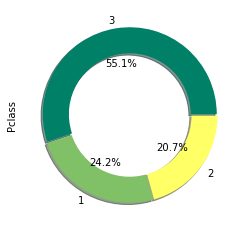

In [22]:
df['Pclass'].value_counts().plot(kind='pie',cmap='summer',wedgeprops=dict(width=0.3)
                                 ,autopct='%3.1f%%',shadow=True,explode=[0.01,0.01,0.01])

#### Encoding Data with LableEncoder

### LabelEncoder

In [23]:
labelencoder=LabelEncoder()

In [24]:
df[["Sex","Embarked"]]=df[["Sex","Embarked"]].apply(labelencoder.fit_transform)

In [25]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


#### Defining Model for Features and Target

In [26]:
features=df.drop(["Survived"],axis=1)

In [27]:
target=df["Survived"]

#### Splitting Data for Training and Testing

In [28]:
features_train, features_test, target_train, target_test = train_test_split(features,target, test_size=0.2,random_state=4)

### Without Scaling

## Model Logistic Regression

In [29]:
model=LogisticRegression(C=500)

In [30]:
model.fit(features_train,target_train)

LogisticRegression(C=500)

In [31]:
prediction_survival=model.predict(features_test)

#### Checking Accuracy ,Recall ,Precision ,F1 Score And Confusion Matrix of Model

In [32]:
print("Training Accuracy of Model is",model.score(features_train,target_train))

Training Accuracy of Model is 0.7794943820224719


In [33]:
print("Testing Accuracy of Model is",model.score(features_test,target_test))

Testing Accuracy of Model is 0.8212290502793296


[[108  11]
 [ 21  39]]


<AxesSubplot:>

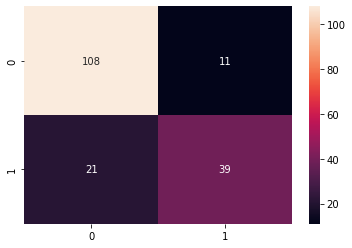

In [34]:
cm=confusion_matrix(target_test,prediction_survival)
print(cm)
sns.heatmap(cm,annot=True,fmt='d')

In [35]:
print("Recall Score of Model is",recall_score(target_test,prediction_survival))

Recall Score of Model is 0.65


In [36]:
print("Precision Score of Model is",precision_score(target_test,prediction_survival))

Precision Score of Model is 0.78


In [37]:
print("F1 Score of Model is",f1_score(target_test,prediction_survival))

F1 Score of Model is 0.709090909090909


In [38]:
print(classification_report(target_test,prediction_survival))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       119
           1       0.78      0.65      0.71        60

    accuracy                           0.82       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.82      0.82      0.82       179



## We can Apply All the algorithm 

In [39]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [40]:
models={'lr':LogisticRegression(),
        'sg':SGDClassifier(),
        'tree':DecisionTreeClassifier(),
        'rf':RandomForestClassifier(),
        'gb':GradientBoostingClassifier(),
        'knn':KNeighborsClassifier(),
        'svm':SVC(),
        'ad':AdaBoostClassifier(),
        'nb':GaussianNB(),
        'lda':LinearDiscriminantAnalysis(),
        'qda':QuadraticDiscriminantAnalysis()
       }

In [41]:
for name, model in models.items():
    model1=model.fit(features_train,target_train)
    y_pred = model1.predict(features_test)
    print(f"{name} confuion matrix: \n {confusion_matrix(target_test,y_pred)}") 
    print(f'{name} accuracy score: {model1.score(features_test,target_test)}')
    print(f'{name} precision score: {precision_score(target_test,y_pred)}')
    print(f'{name} recall score: {recall_score(target_test,y_pred)}')
    print(f'{name} classification report :\n {classification_report(target_test,y_pred)}\n')

lr confuion matrix: 
 [[107  12]
 [ 19  41]]
lr accuracy score: 0.8268156424581006
lr precision score: 0.7735849056603774
lr recall score: 0.6833333333333333
lr classification report :
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       119
           1       0.77      0.68      0.73        60

    accuracy                           0.83       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.83      0.82       179


sg confuion matrix: 
 [[106  13]
 [ 49  11]]
sg accuracy score: 0.6536312849162011
sg precision score: 0.4583333333333333
sg recall score: 0.18333333333333332
sg classification report :
               precision    recall  f1-score   support

           0       0.68      0.89      0.77       119
           1       0.46      0.18      0.26        60

    accuracy                           0.65       179
   macro avg       0.57      0.54      0.52       179
weighted avg       0.61    

## Scaling

In [42]:
col=features_train.columns
col

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

### RobustScaler

In [43]:
rob_scaler=RobustScaler()

In [44]:
features=rob_scaler.fit_transform(features)

In [45]:
features=pd.DataFrame(features,columns=col)

### Splitting After Scaling

In [46]:
features_train, features_test, target_train, target_test = train_test_split(features,target, test_size=0.2,random_state=4)

### Model - LogisticRegression

In [47]:
model=LogisticRegression(C=500)

In [48]:
model.fit(features_train,target_train)

LogisticRegression(C=500)

In [49]:
prediction_survival=model.predict(features_test)

#### Checking Accuracy ,Recall ,Precision ,F1 Score And Confusion Matrix of Model

In [50]:
print("Training Accuracy of Model is",model.score(features_train,target_train))

Training Accuracy of Model is 0.7921348314606742


In [51]:
print("Testing Accuracy of Model is",model.score(features_test,target_test))

Testing Accuracy of Model is 0.8379888268156425


[[108  11]
 [ 18  42]]


<AxesSubplot:>

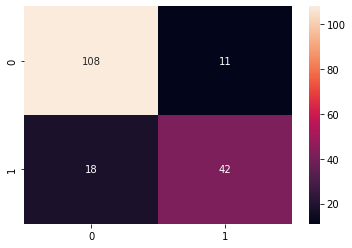

In [52]:
cm=confusion_matrix(target_test,prediction_survival)
print(cm)
sns.heatmap(cm,annot=True,fmt='d')

In [53]:
print("Recall Score of Model is",recall_score(target_test,prediction_survival))

Recall Score of Model is 0.7


In [54]:
print("Precision Score of Model is",precision_score(target_test,prediction_survival))

Precision Score of Model is 0.7924528301886793


In [55]:
print("F1 Score of Model is",f1_score(target_test,prediction_survival))

F1 Score of Model is 0.743362831858407


In [56]:
print(classification_report(target_test,prediction_survival))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       119
           1       0.79      0.70      0.74        60

    accuracy                           0.84       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.84      0.84      0.84       179



## We can Apply All the algorithm 

In [60]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBRFClassifier

In [61]:
models={'lr':LogisticRegression(),
        'sg':SGDClassifier(),
        'tree':DecisionTreeClassifier(),
        'rf':RandomForestClassifier(),
        'gb':GradientBoostingClassifier(),
        'knn':KNeighborsClassifier(),
        'svm':SVC(),
        'ad':AdaBoostClassifier(),
        'nb':GaussianNB(),
        'lda':LinearDiscriminantAnalysis(),
        'qda':QuadraticDiscriminantAnalysis(),
        'xgb':XGBRFClassifier()
       }

In [62]:
for name, model in models.items():
    model1=model.fit(features_train,target_train)
    y_pred = model1.predict(features_test)
    print(f"{name} confuion matrix: \n {confusion_matrix(target_test,y_pred)}") 
    print(f'{name} accuracy score: {model1.score(features_test,target_test)}')
    print(f'{name} precision score: {precision_score(target_test,y_pred)}')
    print(f'{name} recall score: {recall_score(target_test,y_pred)}')
    print(f'{name} classification report :\n {classification_report(target_test,y_pred)}\n')

lr confuion matrix: 
 [[109  10]
 [ 20  40]]
lr accuracy score: 0.8324022346368715
lr precision score: 0.8
lr recall score: 0.6666666666666666
lr classification report :
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       119
           1       0.80      0.67      0.73        60

    accuracy                           0.83       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.83      0.83      0.83       179


sg confuion matrix: 
 [[86 33]
 [11 49]]
sg accuracy score: 0.7541899441340782
sg precision score: 0.5975609756097561
sg recall score: 0.8166666666666667
sg classification report :
               precision    recall  f1-score   support

           0       0.89      0.72      0.80       119
           1       0.60      0.82      0.69        60

    accuracy                           0.75       179
   macro avg       0.74      0.77      0.74       179
weighted avg       0.79      0.75      0.76    

## XGBoost & Random Forest gives Best Accuracy